# Exploring Race in Los Angeles City Census Data
Author: Leslie Velasquez
<br>
Description: In this assignment I will be mapping and analyzing census data with regards to race in the city of Los Angeles. I will provide a basic analyses of all racial groups in the census data, but use maps to specifically focus on identifying areas with majority Hispanic and Non-White populations in Los Angeles.

# Importing Libraries to Read Data
I will first need to import  relevant libraries needed to analyze and map my census data.

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


# Importing the Census Data
Next, I will import my census data.

In [4]:
gdf = gpd.read_file('acs2019_5yr_B03002_14000US06037222001.geojson')

# Exploring the Census Data
I will now use some basic commands to get an overview of the census data. These commands will tell me how many rows and columns my data has, what type of data is in each column, and the name of each column. I will also use a command to view the first five rows of my data table and another command to produce a rough geographic plot of the data. 

In [5]:
gdf.shape

(1005, 45)

In [13]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             1005 non-null   object  
 1   name              1005 non-null   object  
 2   B03002001         1005 non-null   float64 
 3   B03002001, Error  1005 non-null   float64 
 4   B03002002         1005 non-null   float64 
 5   B03002002, Error  1005 non-null   float64 
 6   B03002003         1005 non-null   float64 
 7   B03002003, Error  1005 non-null   float64 
 8   B03002004         1005 non-null   float64 
 9   B03002004, Error  1005 non-null   float64 
 10  B03002005         1005 non-null   float64 
 11  B03002005, Error  1005 non-null   float64 
 12  B03002006         1005 non-null   float64 
 13  B03002006, Error  1005 non-null   float64 
 14  B03002007         1005 non-null   float64 
 15  B03002007, Error  1005 non-null   float64 
 16  B03002008       

In [14]:
gdf.head(5)

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,3095.0,354.0,2616.0,306.0,19.0,15.0,...,12.0,383.0,311.0,74.0,52.0,34.0,28.0,40.0,46.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,3258.0,344.0,2882.0,358.0,74.0,102.0,...,12.0,48.0,55.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,3731.0,465.0,2986.0,435.0,198.0,165.0,...,17.0,874.0,477.0,81.0,80.0,48.0,62.0,33.0,51.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,2338.0,236.0,1812.0,271.0,87.0,107.0,...,12.0,497.0,231.0,45.0,42.0,11.0,18.0,34.0,39.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,394.0,3587.0,363.0,3126.0,359.0,205.0,232.0,...,12.0,45.0,38.0,28.0,32.0,28.0,32.0,0.0,12.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


<AxesSubplot:>

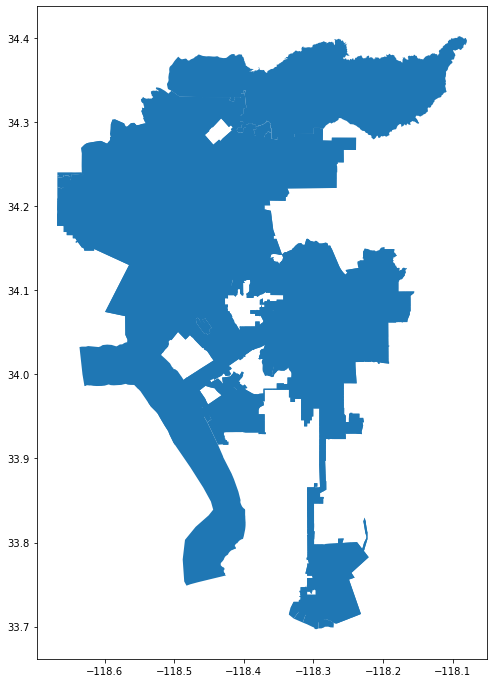

In [15]:
gdf.plot(figsize=(12,12))

# Eliminating Columns
I will now trim my data to only include columns related to the populations of Non-Hispanic White/Black/Asian/Native/Pacific Islander/Multi Racial people and Hispanic people, in order to make the data a bit simpler to understand and analyze. 

In [16]:
list(gdf)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [17]:
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [18]:
gdf = gdf[columns_to_keep]

In [19]:
gdf.head(5)

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


# Renaming Columns
In order to make my data table intelligible, I will change the names of the columns labeled "B(a series of numbers)" to the ethnic/racial group that each represents. I found out what group each column represents by cross referencing the census metadata file. 

In [20]:
list(gdf)

['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [21]:
gdf.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [22]:
gdf.head(5)

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


# Eliminating Los Angeles City Row
Included in my dataset is a row that represents Los Angeles city as a whole, rather than a specific census tract. To make sure my data is consistent, and only analyze the population of the city by census tract, I will run a command to eliminate this row from my dataset.

In [36]:
gdf.sort_values(by='Total',ascending = False)

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
1004,16000US0644000,"Los Angeles, CA",3966936.000,2044527.000,1129956.000,341750.000,6374.000,454688.000,5103.000,14762.000,91894.000,1922409.000,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."
922,14000US06037275602,"Census Tract 2756.02, Los Angeles, CA",12100.000,10449.000,6371.000,795.000,0.000,2802.000,0.000,0.000,481.000,1651.000,"MULTIPOLYGON (((-118.43226 33.97502, -118.4292..."
847,14000US06037265301,"Census Tract 2653.01, Los Angeles, CA",11977.000,9290.000,3160.000,486.000,17.000,4808.000,19.000,22.000,778.000,2687.000,"MULTIPOLYGON (((-118.45549 34.07585, -118.4546..."
531,14000US06037206020,"Census Tract 2060.20, Los Angeles, CA",8947.000,5083.000,1657.000,2773.000,51.000,328.000,49.000,59.000,166.000,3864.000,"MULTIPOLYGON (((-118.23787 34.05427, -118.2378..."
84,14000US06037111400,"Census Tract 1114, Los Angeles, CA",8735.000,5011.000,3376.000,390.000,0.000,1227.000,0.000,18.000,0.000,3724.000,"MULTIPOLYGON (((-118.50240 34.25117, -118.5023..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,14000US06037980022,"Census Tract 9800.22, Los Angeles, CA",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,"MULTIPOLYGON (((-118.50266 34.30809, -118.5026..."
998,14000US06037980023,"Census Tract 9800.23, Los Angeles, CA",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,"MULTIPOLYGON (((-118.64870 34.23120, -118.6480..."
995,14000US06037980020,"Census Tract 9800.20, Los Angeles, CA",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,"MULTIPOLYGON (((-118.34412 34.21700, -118.3438..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."


In [37]:
gdf = gdf.drop([1004])

In [38]:
gdf.sort_values(by='Total',ascending = False)

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
922,14000US06037275602,"Census Tract 2756.02, Los Angeles, CA",12100.000,10449.000,6371.000,795.000,0.000,2802.000,0.000,0.000,481.000,1651.000,"MULTIPOLYGON (((-118.43226 33.97502, -118.4292..."
847,14000US06037265301,"Census Tract 2653.01, Los Angeles, CA",11977.000,9290.000,3160.000,486.000,17.000,4808.000,19.000,22.000,778.000,2687.000,"MULTIPOLYGON (((-118.45549 34.07585, -118.4546..."
531,14000US06037206020,"Census Tract 2060.20, Los Angeles, CA",8947.000,5083.000,1657.000,2773.000,51.000,328.000,49.000,59.000,166.000,3864.000,"MULTIPOLYGON (((-118.23787 34.05427, -118.2378..."
84,14000US06037111400,"Census Tract 1114, Los Angeles, CA",8735.000,5011.000,3376.000,390.000,0.000,1227.000,0.000,18.000,0.000,3724.000,"MULTIPOLYGON (((-118.50240 34.25117, -118.5023..."
128,14000US06037119002,"Census Tract 1190.02, Los Angeles, CA",7976.000,1332.000,410.000,89.000,0.000,766.000,0.000,9.000,58.000,6644.000,"MULTIPOLYGON (((-118.44012 34.25295, -118.4386..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,14000US06037980020,"Census Tract 9800.20, Los Angeles, CA",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,"MULTIPOLYGON (((-118.34412 34.21700, -118.3438..."
997,14000US06037980022,"Census Tract 9800.22, Los Angeles, CA",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,"MULTIPOLYGON (((-118.50266 34.30809, -118.5026..."
998,14000US06037980023,"Census Tract 9800.23, Los Angeles, CA",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,"MULTIPOLYGON (((-118.64870 34.23120, -118.6480..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."


# Basic Statistical Analyses
I will now use commands to perform basic statistic analyses of each racial group in the census data. With these commands, I will determine the mean, minimum and maximum values, standard deviation, etc. for each racial group by census tract. I will also create histograms to plot the frequency of each racial group in census tracts.

In [39]:
gdf['Non Hispanic White'].describe()

count   1004.000
mean    1128.479
std     1108.227
min        0.000
25%      186.500
50%      761.500
75%     1815.500
max     6371.000
Name: Non Hispanic White, dtype: float64

<AxesSubplot:ylabel='Frequency'>

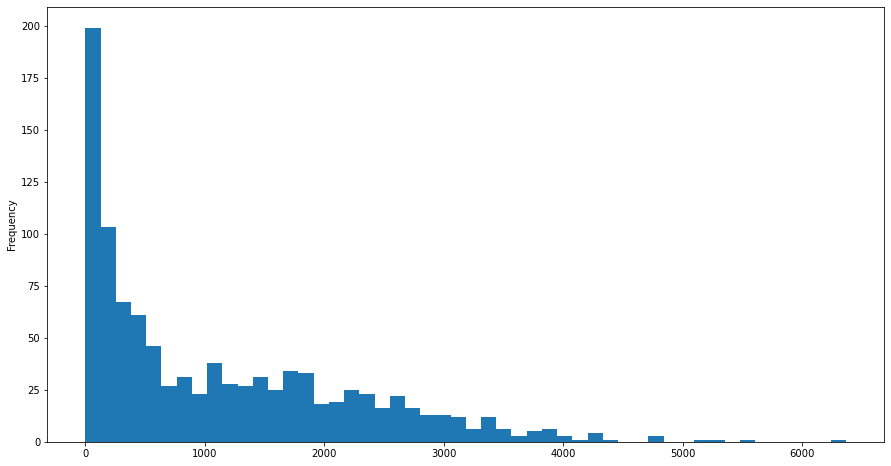

In [40]:
gdf['Non Hispanic White'].plot.hist(figsize=(15,8),bins=50)

In [41]:
gdf['Non Hispanic Black'].describe()

count   1004.000
mean     340.844
std      534.458
min        0.000
25%       62.000
50%      156.000
75%      347.250
max     4197.000
Name: Non Hispanic Black, dtype: float64

<AxesSubplot:ylabel='Frequency'>

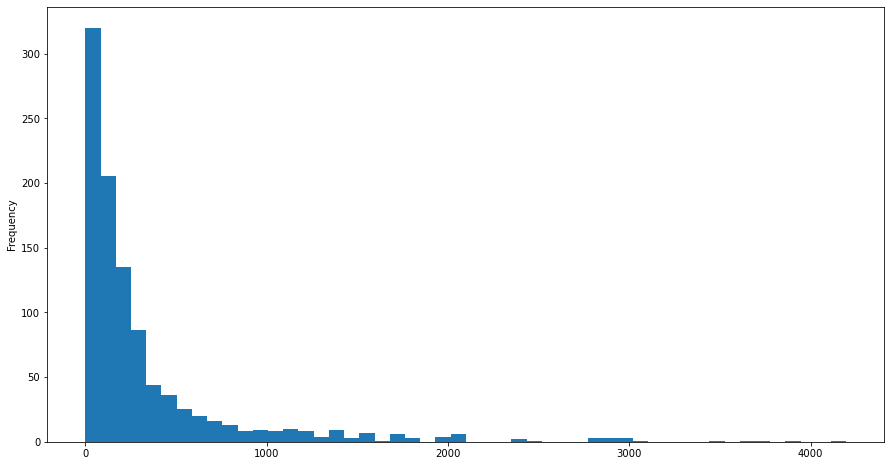

In [42]:
gdf['Non Hispanic Black'].plot.hist(figsize=(15,8),bins=50)

In [43]:
gdf['Non Hispanic American Indian and Alaska Native'].describe()

count   1004.000
mean       6.409
std       17.843
min        0.000
25%        0.000
50%        0.000
75%        4.250
max      280.000
Name: Non Hispanic American Indian and Alaska Native, dtype: float64

<AxesSubplot:ylabel='Frequency'>

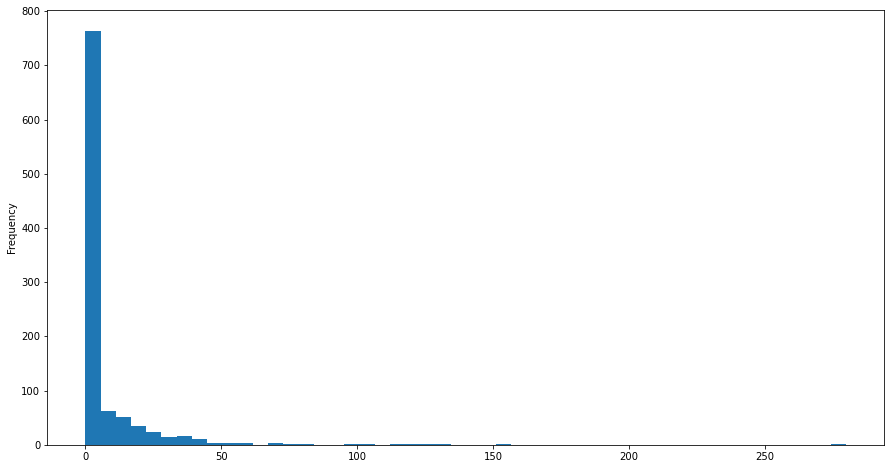

In [44]:
gdf['Non Hispanic American Indian and Alaska Native'].plot.hist(figsize=(15,8),bins=50)

In [45]:
gdf['Non Hispanic Asian'].describe()

count   1004.000
mean     453.108
std      494.203
min        0.000
25%      115.750
50%      316.500
75%      635.250
max     4808.000
Name: Non Hispanic Asian, dtype: float64

<AxesSubplot:ylabel='Frequency'>

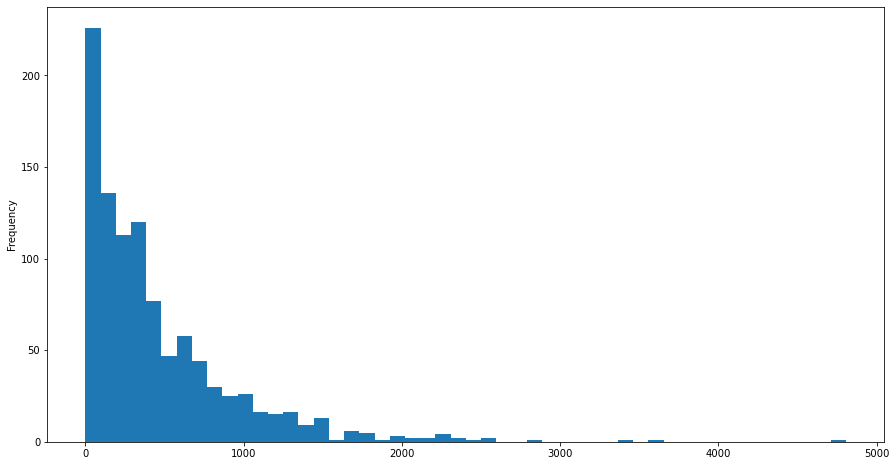

In [46]:
gdf['Non Hispanic Asian'].plot.hist(figsize=(15,8),bins=50)

In [47]:
gdf['Hispanic'].describe()

count   1004.000
mean    1916.498
std     1369.044
min        0.000
25%      712.250
50%     1754.000
75%     2893.250
max     7433.000
Name: Hispanic, dtype: float64

<AxesSubplot:ylabel='Frequency'>

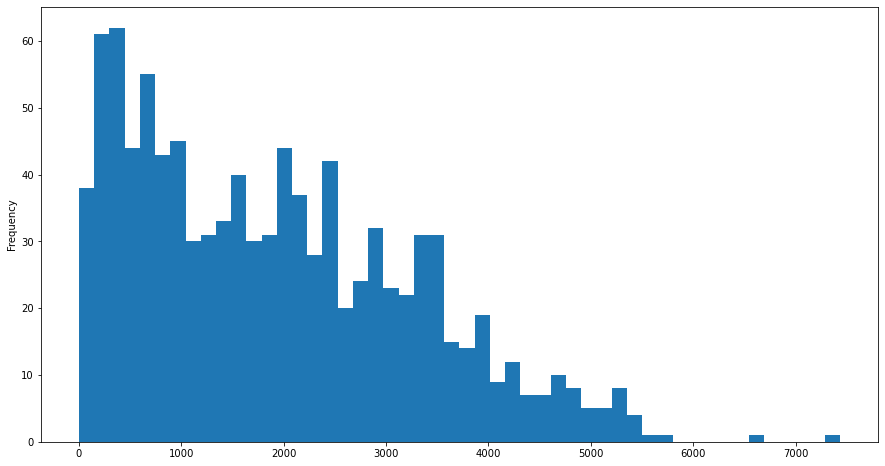

In [52]:
gdf['Hispanic'].plot.hist(figsize=(15,8),bins=50)

In [66]:
gdf['Non Hispanic Native Hawaiian and Other Pacific Islander'].describe()

count   1004.000
mean       5.083
std       20.189
min        0.000
25%        0.000
50%        0.000
75%        0.000
max      360.000
Name: Non Hispanic Native Hawaiian and Other Pacific Islander, dtype: float64

<AxesSubplot:ylabel='Frequency'>

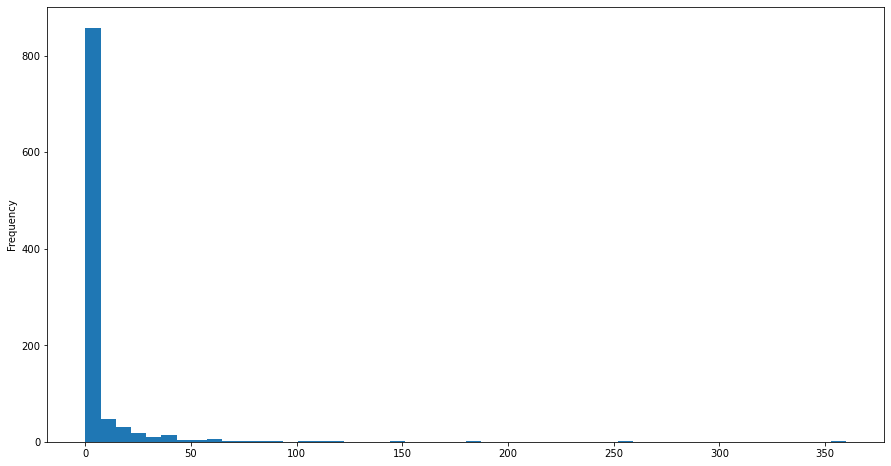

In [67]:
gdf['Non Hispanic Native Hawaiian and Other Pacific Islander'].plot.hist(figsize=(15,8),bins=50)

In [68]:
gdf['Non Hispanic Some other race'].describe()

count   1004.000
mean      14.752
std       34.233
min        0.000
25%        0.000
50%        0.000
75%       16.000
max      388.000
Name: Non Hispanic Some other race, dtype: float64

<AxesSubplot:ylabel='Frequency'>

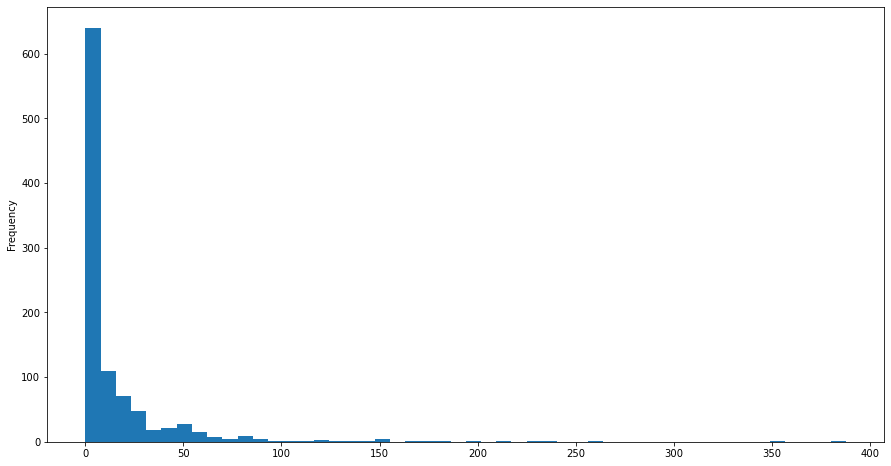

In [69]:
gdf['Non Hispanic Some other race'].plot.hist(figsize=(15,8),bins=50)

In [70]:
gdf['Non Hispanic Two or more races'].describe()

count   1004.000
mean      91.867
std       92.125
min        0.000
25%       22.000
50%       67.000
75%      133.250
max      778.000
Name: Non Hispanic Two or more races, dtype: float64

<AxesSubplot:ylabel='Frequency'>

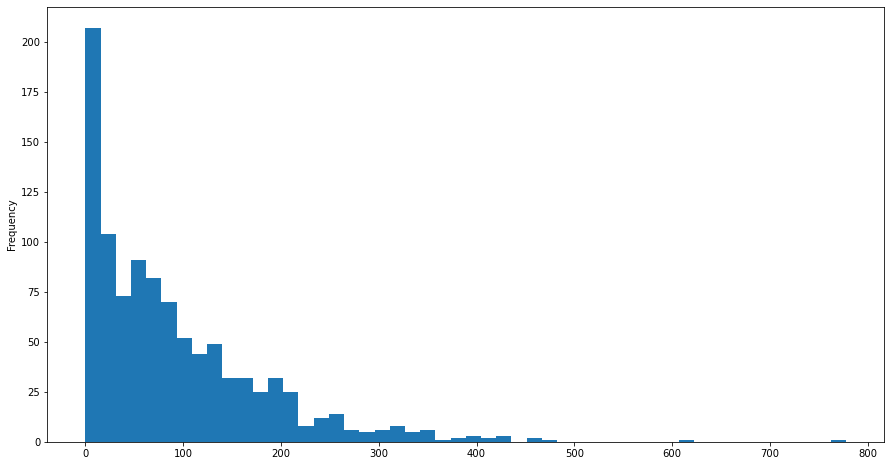

In [71]:
gdf['Non Hispanic Two or more races'].plot.hist(figsize=(15,8),bins=50)

# Analyzing Race in Los Angeles by Percent
To determine the relative concentration of each racial/ethnic group within their census tracts, I will add columns that calculate the percentage of each racial group in the overall census tract population.

In [53]:
list(gdf)

['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [93]:
gdf['Percent Non Hispanic'] = gdf['Non Hispanic']/gdf['Total']*100
gdf['Percent Hispanic'] = gdf['Hispanic']/gdf['Total']*100
gdf['Percent Non Hispanic White'] = gdf['Non Hispanic White']/gdf['Total']*100
gdf['Percent Non Hispanic Black'] = gdf['Non Hispanic Black']/gdf['Total']*100
gdf['Percent Non Hispanic American Indian and Alaska Native'] = gdf['Non Hispanic American Indian and Alaska Native']/gdf['Total']*100
gdf['Percent Non Hispanic Asian'] = gdf['Non Hispanic Asian']/gdf['Total']*100
gdf['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = gdf['Non Hispanic Native Hawaiian and Other Pacific Islander']/gdf['Total']*100
gdf['Percent Non Hispanic Some other race'] = gdf['Non Hispanic Some other race']/gdf['Total']*100
gdf['Percent Non Hispanic Two or more races'] = gdf['Non Hispanic Two or more races']/gdf['Total']*100

In [73]:
list(gdf)

['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry',
 'Percent Non Hispanic',
 'Percent Hispanic',
 'Percent Non Hispanic White',
 'Percent Non Hispanic Black',
 'Percent Non Hispanic American Indian and Alaska Native',
 'Percent Non Hispanic Asian',
 'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Percent Non Hispanic Some other race',
 'Percent Non Hispanic Two or more races']

In [74]:
gdf.head(5)

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,...,geometry,Percent Non Hispanic,Percent Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.000,3095.000,2616.000,19.000,3.000,331.000,3.000,8.000,...,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",72.262,27.738,61.079,0.444,0.070,7.728,0.070,0.187,2.685
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.000,3258.000,2882.000,74.000,15.000,220.000,0.000,0.000,...,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",95.683,4.317,84.640,2.173,0.441,6.461,0.000,0.000,1.968
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.000,3731.000,2986.000,198.000,0.000,486.000,0.000,47.000,...,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",58.784,41.216,47.046,3.120,0.000,7.657,0.000,0.741,0.221
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.000,2338.000,1812.000,87.000,0.000,341.000,0.000,0.000,...,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",63.155,36.845,48.947,2.350,0.000,9.211,0.000,0.000,2.647
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.000,3587.000,3126.000,205.000,0.000,194.000,0.000,0.000,...,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",92.353,7.647,80.484,5.278,0.000,4.995,0.000,0.000,1.596


# Mapping "Majority Minority" Communities in Los Angeles
Lastly, I will use the percentages I've calculated to create maps that will identify where populations of majority Hispanic, Black, Asian, Native American, Pacific Islander and Multi-Racial communities exist in the city of Los Angeles.

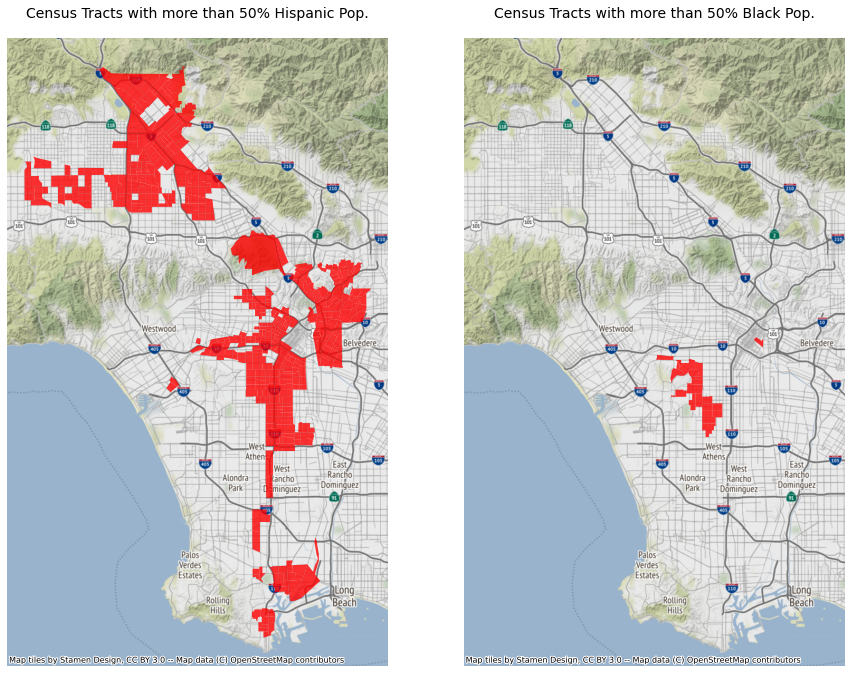

In [92]:

fig, axs = plt.subplots(1, 2, figsize=(15, 12),sharex=True,sharey=True)

ax1, ax2 = axs

gdf_web_mercator[gdf_web_mercator['Percent Hispanic'] > 50].plot(ax=ax1, 
                                                                           alpha=0.8, 
                                                                           color="red")

ax1.axis("off")
ax1.set_title('Census Tracts with more than 50% Hispanic Pop.',fontsize=14, pad=20)

ctx.add_basemap(ax1)

gdf_web_mercator[gdf_web_mercator['Percent Non Hispanic Black'] > 50].plot(ax=ax2, 
                                                                           alpha=0.8, 
                                                                           color="red")


ax2.axis("off")
ax2.set_title('Census Tracts with more than 50% Black Pop.',fontsize=14, pad=20)

ctx.add_basemap(ax2)

/opt/conda/lib/python3.9/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


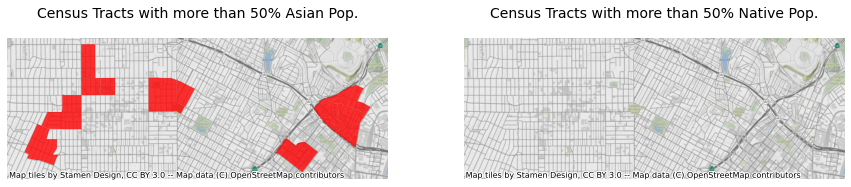

In [94]:

fig, axs = plt.subplots(1, 2, figsize=(15, 12),sharex=True,sharey=True)

ax1, ax2 = axs

gdf_web_mercator[gdf_web_mercator['Percent Non Hispanic Asian'] > 50].plot(ax=ax1, 
                                                                           alpha=0.8, 
                                                                           color="red")

ax1.axis("off")
ax1.set_title('Census Tracts with more than 50% Asian Pop.',fontsize=14, pad=20)

ctx.add_basemap(ax1)

gdf_web_mercator[gdf_web_mercator['Percent Non Hispanic American Indian and Alaska Native'] > 50].plot(ax=ax2, 
                                                                           alpha=0.8, 
                                                                           color="red")


ax2.axis("off")
ax2.set_title('Census Tracts with more than 50% Native Pop.',fontsize=14, pad=20)

ctx.add_basemap(ax2)

I also attempted to map census tracts with over 50% Non Hispanic Pacific Islander and Non Hispanic Two or More Race populations, however, they could not be mapped as census tracts with these populations do not exist in the city of Los Angeles.